# TP2 : Autour de RSA 

### I - Preliminaire : Sagemath et les nombres premiers

a et b sont ici considérés comme des entiers

- is_prime(a)  permet de savoir si le nombre a est un nombre premier ou non 

In [ ]:
is_prime(7)

In [ ]:
is_prime(4)

- prime_range(a,b) retourne la liste des nombres premiers entre a inclus et b exclu. Si b est omis, alors elle retourne l'ensemble des nombres premiers jusqu'au nombre a 

In [ ]:
prime_range(2,13)

- next_prime(a) retourne le premier nombre premier strictement plus grand que a

In [ ]:
next_prime(7)

- factor(a) retourne la factorisation en nombre premier du nombre a

In [ ]:
factor(30)

In [ ]:
factor(125)

- prime_pi(a) retourne le nombre de nombres premiers inferieur ou egale à a.

In [ ]:
prime_pi(13)

In [ ]:
prime_pi(45)

### 2 - Nombres premiers

In [65]:
from sage.misc.sage_timeit import sage_timeit

In [ ]:
timeit('prime_pi(10**15) ', seconds = True)

on constate que pour 10^15, la commande prime_pi s'execute avec un temps d'execution superieur à la minute

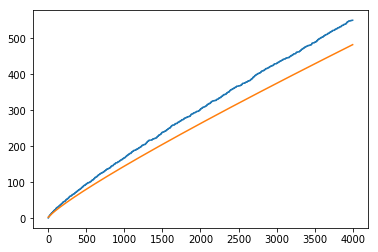

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([n for n in range(2,4000)])
y = np.array([prime_pi(n) for n in range(2,4000)])
z = np.array([n/log(n) for n in range(2,4000)])
plt.plot(x, y)
plt.plot(x,z)
plt.show()

In [ ]:
x = np.array([n for n in range(2,15)])
y = np.array([prime_pi(n)*(n/log(n)) for n in range(2,15)])
plt.plot(x,y)
plt.show()

commentaire :  (un) est une suite "pseudo-escalier". A chaque fois qu'il y a un nombre premier on observe un 'saut'

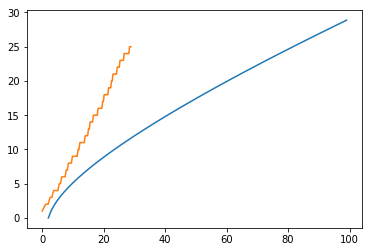

In [4]:
t = var('t')
x = np.array([n for n in range(2,100)])
z = np.array([prime_pi(n) for n in range(2,100)])
y = np.array([integral(1/log(t),t,2,n) for n in range(2,100)])
plt.plot(x,y)
plt.plot(y,z)
plt.show()

In [ ]:
x = np.array([n for n in range(2,100)])
z = np.array([integral(1/log(t),t,2,n)*prime_pi(n) for n in range(2,100)])
plt.plot(x,z)
plt.show()

#### 2.2 Nombre de fermat


On genere une liste de nombres satisfaisant la formule proposée par fermat et l'on verifie si ceux-ci sont premiers, si l'un d'entre eux n'est pas premier alors on peut conclure que la formule proposée ne marche pas. 

In [5]:
l = [2^(2^i) +1 for i in range(10)]
for c,x in enumerate(l):
    if not is_prime(x):
        print('la formule est fausse, en effet pour l\'entier ' + str(c) + ' la formule retourne un nombre non premier')

la formule est fausse, en effet pour l'entier 5 la formule retourne un nombre non premier
la formule est fausse, en effet pour l'entier 6 la formule retourne un nombre non premier
la formule est fausse, en effet pour l'entier 7 la formule retourne un nombre non premier
la formule est fausse, en effet pour l'entier 8 la formule retourne un nombre non premier
la formule est fausse, en effet pour l'entier 9 la formule retourne un nombre non premier


#### 2.3 Nombre de Mersenne


Supposons que p ne soit pas premier, on a alors : 
$ 2^{p} - 1 = 2^{jq} -1 = 2^{j^{q}} -1 = (2^{q} - 1) \sum \limits_{i=0}^{j-1} 2^{i} $


 $M_{p}$ est divisible par $(2^{q} - 1)$ donc n'est pas premier.
 
Ainsi par contraposée si p n'est pas premier alors $M_{p}$ ne peut pas etre premier


In [4]:
l= []
Mers =[]
c =0

for i in range(1,258):
    if is_prime(i):
        c+=1
        l.append(i)
        Mers.append([i,2^(i) - 1])
print("il y a "+ str(c)+ " nombres premiers inferieur ou egaux a 257")

il y a 55 nombres premiers inferieur ou egaux a 257


In [8]:
l2 = []
for x in Mers:
    if is_prime(x[1]):
        l2.append(x[0])

In [9]:
l2

[2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127]

- $M_{p}$ est premier pour p $\in$ {2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127} donc $M_{257}$ et $M_{67}$ ne sont pas premiers comme l'affirmait Mersenne contrairement à $M_{61}$ et $M_{89}$

Decomposition en facteur premier de $M_{41}$ et $M_{47}$ :

In [32]:
# M41
factor(2^(41) -1)

13367 * 164511353

In [33]:
#M47
factor(2^(47)-1)

2351 * 4513 * 13264529

In [11]:
a =[]
for x in l2:
    a.append((2^(x)-1)*2^(x-1))

In [20]:
def est_parfait(l):
    for p in l:
        n = 2^(p-1) * (2^p-1)
        s = sum(divisors(n)) -n # diviseur strict
        if n!=s:
            return False
        return True
est_parfait(l2)

True

#### 2.4 Test de primalite pour les nombres de Mersenne

In [21]:
def test_lucas(s):
    n = 2^s - 1
    l = mod(4,n)
    for i in range(1,s-1):
        l = mod(l^2-2,n)
    if l==0:
        return True
    return False


In [29]:
import time

def mersenneMax(temps):
    deb = time.time()
    arret = deb + temps
    s = 3
    while time.time() < arret:
        test_lucas(s)
        s +=2
    return s
mersenneMax(300)

4355

Le plus grand exposant trouvé en moins de 5 minute est donc 4355.

### 3 - Algorithme d'exponentiation

#### 3.1 naif iteratif et naif recursif

In [2]:
def ite(x,n):
    a=1
    for  i in range(n):
        a*=x
    return a
ite(3,3)

27

In [3]:
def recur(x,n):
    if n==0:
        return 1
    return x*recur(x,n-1)

recur(3,3)

27

In [9]:
a = 0 # temps moyen pour le programme recursif
b =0# temps moyen pour le programme itératf
c = 0
for x in range(40):
    for i in range(5):
        a += timeit('recur(x,i)', seconds= True)/200
        b += timeit('ite(x,i)', seconds= True)/200
        c += timeit('x^i',seconds = True)/200
print(a)
print(b)
print(c)


5.106690400396471e-06
2.7647407999029374e-06
5.250791996950286e-07


On constate qu'en temps moyen le programme iteratif est plus performant que le programme récursif mais que la methode sagemath usuelle est la plus performante

#### 3.2 Dichotomique iteratif et dichotomique recursif

In [13]:
def dicho_ite(x,n):
    res = 1
    if mod(n,2)==0:
        for i in range(n/2):
            res = res*x^2 
    else:
        res = res * x
        for i in range((n-1)/2):
            res = res* x^2 
    return res
dicho_ite(4,4)

256

In [7]:
def dicho_recur(x,n,y):
    if n==0:
        return 1
    if mod(n,2)==0:
        return dicho_recur(x*x,n/2,y)
    if mod(n,2)!=0:
        return x * dicho_recur(x*x,(n-1)/2,y*x)
dicho_recur(3,3,1)

27

In [14]:
a = 0 # temps moyen pour le programme recursif
b =0# temps moyen pour le programme itératf
c = 0 # temps moyen pour la methode usuelle
for x in range(40):
    for i in range(5):
        a += timeit('dicho_recur(x,i,1)', seconds= True)/200
        b += timeit('dicho_ite(x,i)', seconds= True)/200
        c += timeit('x^i',seconds = True)/200
print(a)
print(b)
print(c)
        

4.749548159900585e-05
2.0276457601110447e-05
4.99130399781279e-07


On constate qu'en temps moyen le programme iteratif est plus efficace que le recursif mais que la methode sagemath usuelle est toujours plus performante !

####  3.3 Algorithme d’exponentiation modulaire

De par la propriete : $ a \equiv r $ [n] et $ b \equiv h $ [n]  $ \implies ab \equiv  rh $ [n]

On peut ajuster l'algorithme precedent comme suit pour calculer $x^{n}$ [N]

$ x^{n} $ [N] =$ \left\{
    \begin{array}{ll}
        x^{2} [N]^{n/2} \space si \space n \space est \space pair \\
        x[N](x^{2}[N])^{n/2} \space si\space n \space est \space impair 
    \end{array}
\right.$



In [36]:
def expo_mod(x,n,md):
    r = 1
    z = 0
    if mod(n,2)==0:
        while z<n/2:
            z+=1
            r = mod(x^2*r,md)
    else:
        r = mod(x,md)
        while z<(n-1)/2:
            z += 1
            r = mod(x^2*r,md)
    return r

expo_mod(3,3,5)

2

### 4 - Cryptosysteme RSA
#### 4.2 L’ensemble des messages, codage, d´ecodage

In [27]:
def numerise(a,N):
    l = []
    c=1 # va nous donner la taille des paquets
    while N//(2^(c-1))>1:
        c+=1
    a2 = BinaryStrings().encoding(a)
    i = 0
    while i+c<=len(a2):
        i +=c
        s = int(str(a2[i-c:i]), base=2)
        l.append(s)
    reste = len(a2) - i
    if reste!=0:
        s = int(str(a2[i:len(a2)]), base=2)
        l.append(s)
    return (l, reste)
    

In [6]:
numerise("allee la",13)

([6, 1, 6, 12, 6, 12, 6, 5, 6, 5, 2, 0, 6, 12, 6, 1], 0)

In [31]:
from sage.monoids.string_monoid_element import StringMonoidElement
def alphabetise(code, N, reste):
    c=1 # va nous donner la taille des paquets
    while N//(2^(c-1))>1:
        c+=1
    dernierPaquet = code[-1]
    if reste!=0:
        code = [format(x, 'b').zfill(c) for x in code[:len(code)-1]]
        dernierPaquet = format(dernierPaquet, 'b').zfill(reste)
        code.append(dernierPaquet)
    else:
        code = [format(x, 'b').zfill(c) for x in code[:len(code)]]
    message = "".join(code)
    message = StringMonoidElement(BinaryStrings(), message)
    message = message.decoding()
    return message

In [8]:
(code,reste) = numerise("alleee la",15)
print(code)

[6, 1, 6, 12, 6, 12, 6, 5, 6, 5, 6, 5, 2, 0, 6, 12, 6, 1]


In [5]:
print(alphabetise(code,15,reste))


5.614559998502955e-06

#### 4.3


Tout d’abord, il est à noter qu’il est important de bien dimensionner sa clé. On sait en effet aujourd’hui qu’une clé codant son module n sur 768  bits est cassable pour le chiffrement RSA et qu’il vaut mieux aller plus haut (on conseille aujourd’hui non plus les clefs de 1024 mais au moins de 2048 bits).  
La factorisation de l’entier n en p et q permet de trouver $\phi(n)$ et puis la clef privée d.
Les nombres de Mersenne doivent être évités, on conseille en effet de choisir p et q de manière à éviter que les nombres p+1, p-1, q+1 et q-1 soient facilement factorisable. En effet n = pxq risquerait de l'être aussi par l'utilisation d'algorithmes spécialisés de factorisation qui savent tirer parti des factorisations de leurs chiffres adjacents. 
L’exposant de chiffrement e ne doit etre choisi trop petit car si l'on envoie le meme message à plusieurs personnes, on peut alors facilement à l'aide du theoreme des restes chinois et quelques manipulations rapidement retrouver le message d'origine. 
Il faut également que les deux nombres premiers p et q (tq p*q =n) ne soient pas trop proche l'un de l'autre (attaque de WIENER)



In [35]:
import math
def len_int(n):
    return int(math.log10(n))+1

def cleRSA(m=30):
    m = m/2
    nbre_bits = floor(m/math.log10(2)) + 1
    p = random_prime(2^nbre_bits-1,false,2^(nbre_bits-1))
    q = random_prime(2^nbre_bits-1,false,2^(nbre_bits-1))
    N = p*q
    phi = (p-1)*(q-1)
    e = ZZ.random_element(phi)
    d=1
    while gcd(e,phi)!= 1:
        e = ZZ.random_element(phi)
        bezout = xgcd(e,phi)
        d = Integer(mod(bezout[1],phi))
    public_key = (N,e,d)
    return public_key



In [34]:
n = cleRSA(30)
n

(596076384756272349683774210077,
 435780426823441850136970623721,
 129610975892200366129351566361)

In [36]:
def limite_factor(N):
    deb = time.time()
    N = cleRSA(N)[0]
    print("La cle N a factoriser : ", N)
    print("La cle factorisee : ",factor(N))
    fin = time.time()
    print("Le temps en seconde mit a factoriser la cle : ", fin-debut)

In [37]:
limite_factor(75)

La cle N a factoriser :  984760819416988382525991004088550797160145449156453388055341188682056615757


/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:5: RuntimeWarning: cypari2 leaked 59832 bytes on the PARI stack


KeyboardInterrupt: 

In [25]:
print("Clef 1")
c1 = cleRSA()
print(c1)
print("Longeur de la clef :", len_int(c1[0]))
print("Clef 2")
c2 = cleRSA()
print(c2)
print("Longeur de la clef :", len_int(c2[0]))
print("Clef 3")
c3 = cleRSA()
print(c3)
print("Longeur de la clef :", len_int(c3[0]))
print("Clef 4")
c4 = cleRSA()
print(c4)
print("Longeur de la clef :", len_int(c4[0]))

Clef 1
(420135225746931735394139900789, 337220223493818646918980566723, 213293065068225391047119081327)
Longeur de la clef : 30
Clef 2
(417220060329024647104849109537, 62525039070478244465959167589, 165599655940969868915846992225)
Longeur de la clef : 30
Clef 3
(578187932438703539897530636667, 481688728674744182830671061825, 73717018776606010974860159761)
Longeur de la clef : 30
Clef 4
(706309965028502476813246315607, 481423795332972207584007828289, 497884666920891800710153789129)
Longeur de la clef : 30


In [17]:
from sage.misc.sage_timeit import sage_timeit
print(timeit('factor(c1[0])', seconds=True))

0.10710462000024563


In [21]:
print(timeit('factor(c2[0])', seconds=True))

0.11922797999977774


In [19]:
print(timeit('factor(c3[0])', seconds=True))

0.1298525599999266


In [20]:
print(timeit('factor(c4[0])', seconds=True))

0.10018831999987014


En moyenne, factor() met $10^{-1}$ à casser les clefs de 30 chiffres

#### 4.4 Fonctions de chiffrement et de déchiffrement

In [29]:
def chiffrement(code,cle_publique):
    return power_mod(code,cle_publique[1],cle_publique[0])
def dechiffrement(code,cle_privee):
    return power_mod(code,cle_privee[1],cle_privee[0])

In [48]:
def protocole1(Nc,m1,s1):
    bob = cleRSA(3*Nc+1)
    alice = cleRSA(3*Nc+1)
    clef_privee_alice = (alice[0],alice[2])
    clef_publique_alice = (alice[0],alice[1])
    clef_privee_bob = (bob[0],bob[2])
    clef_publique_bob = (bob[0],bob[1])
    (code,last) = numerise(s1,Nc)
    (code1,last1) = numerise(m1,Nc)
    m2c = [chiffrement(x,clef_publique_bob) for x in code1]
    s2c = [chiffrement(x,clef_privee_alice) for x in code]
    m2d = [dechiffrement(x, clef_privee_bob) for x in m2c]
    s2d = [dechiffrement(x,clef_publique_alice) for x in s2c]
    m2d = alphabetise(m2d,Nc,last1)
    s2d = alphabetise(s2d,Nc,last)
    return (m2d,s2d)

print(protocole1(29,"Bonjour ", "Alice "))
print(protocole1(11,"Adieu ","BOB"))

('Bonjour ', 'Alice ')
('Adieu ', 'BOB')


In [52]:
def protocole2(m1,nb_a,nb_b):
    bob = cleRSA(nb_b)
    alice = cleRSA(nb_a)
    clef_privee_alice = (alice[0],alice[2])
    clef_publique_alice = (alice[0],alice[1])
    clef_privee_bob = (bob[0],bob[2])
    clef_publique_bob = (bob[0],bob[1])
    str_Na = str(clef_privee_alice[0])
    str_Nb = str(clef_privee_bob[0])  
    if len(str_Na) > len(str_Nb):
        (code,last) = numerise(m1,nb_a)
        m2c = [chiffrement(x,clef_publique_bob) for x in code]
        m3c = [chiffrement(x,clef_privee_alice) for x in m2c]
        m2c_bob = [dechiffrement(x,clef_publique_alice) for x in m3c]
        m1c_bob = [dechiffrement(x, clef_privee_bob) for x in m2c_bob]     
        return alphabetise(m1c_bob,nb_a,last)
    
    elif len(str_Na) < len(str_Nb):
        (code,last) = numerise(m1,nb_b)
        m2c =[chiffrement(x,clef_privee_alice) for x in code]
        m3c = [chiffrement(x,clef_publique_bob) for x in m2c]
        m2c_bob = [dechiffrement(x, clef_privee_bob) for x in m3c]
        m1c_bob = [dechiffrement(x,clef_publique_alice)for x in m2c_bob]
        return alphabetise(m1c_bob,nb_b,last)

In [57]:
print(protocole2("Bonjour ",23,54))
print(protocole2("Adieu ",45,24))

Bonjour 
Adieu 
